In [ ]:
import pandas as pd

df = pd.read_csv('/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()



,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [ ]:
# Show summary statistics
df['Financial Loss (in Million $)'].describe()

# Check for missing values
df['Financial Loss (in Million $)'].isnull().sum()


np.int64(0)

In [ ]:
# Remove extra spaces, unify attack names
df['Attack Type'] = df['Attack Type'].str.strip().str.title()
df['Target Industry '] = df['Target Industry'].str.strip().str.title()

# Ensure Year is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Attack Type', 'Target Industry'])  # Remove incomplete rows


In [ ]:
!pip install seaborn plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Line Chart – Number of Attacks per Year



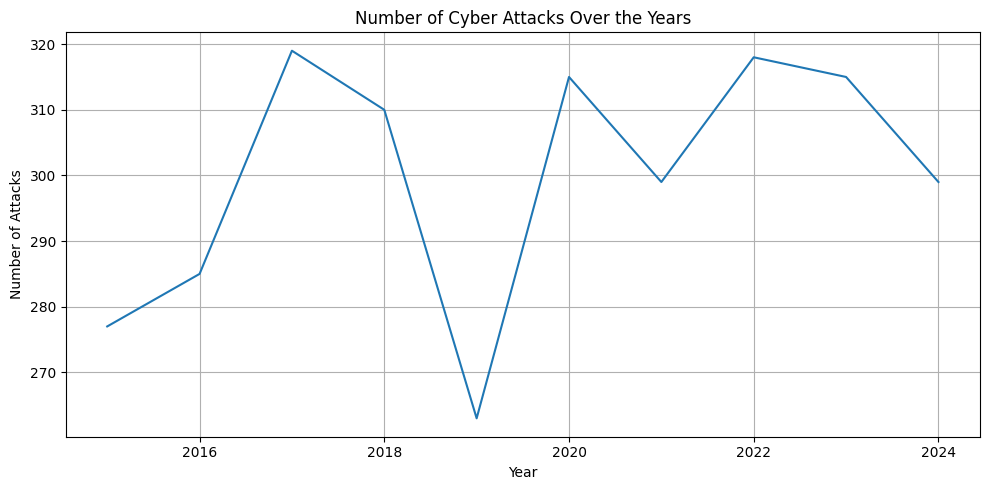

In [ ]:
attacks_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Number of Cyber Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Chart – Top 10 Attack Types

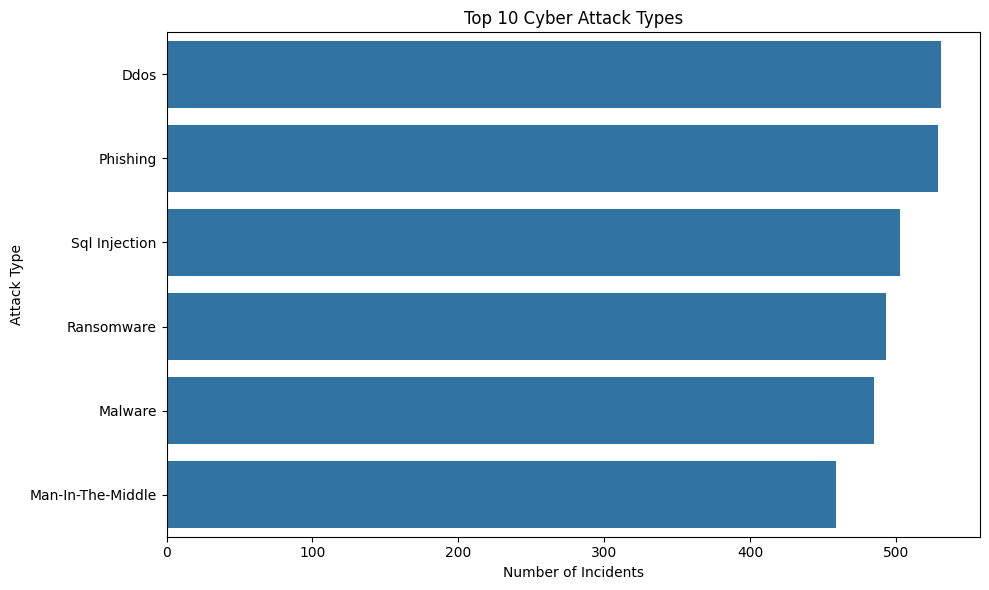

In [ ]:
attack_counts = df['Attack Type'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.values, y=attack_counts.index)
plt.title('Top 10 Cyber Attack Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


 Pie Chart – Industry-wise Distribution

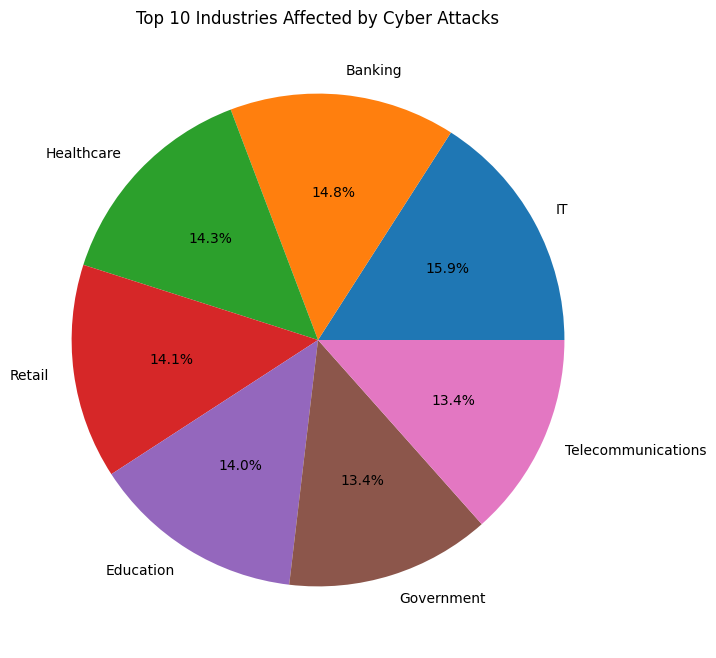

In [ ]:
industry_counts = df['Target Industry'].value_counts().nlargest(10)
industry_counts.plot.pie(autopct='%1.1f%%', figsize=(8,8), title='Top 10 Industries Affected by Cyber Attacks')
plt.ylabel('')
plt.show()


Heatmap – Frequency of Attacks by Year and Industry

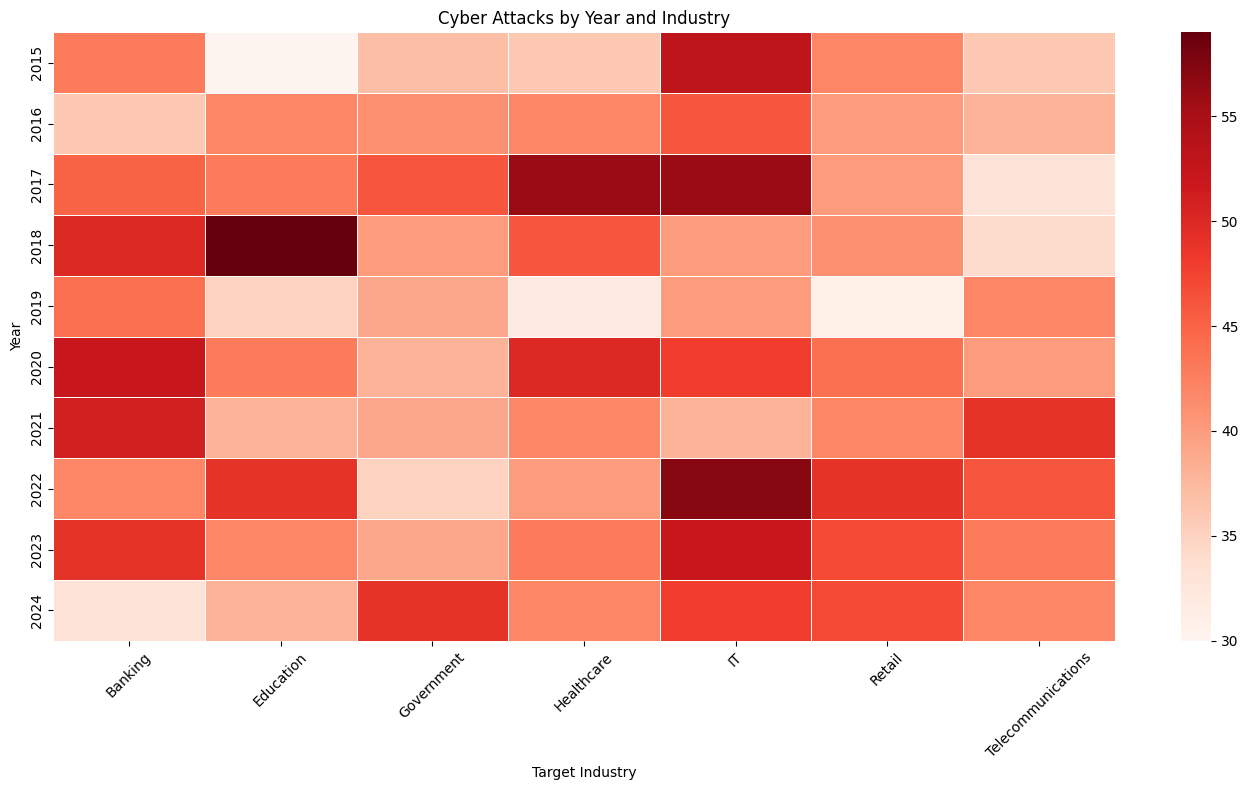

In [ ]:
heatmap_data = df.groupby(['Year', 'Target Industry']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5)
plt.title('Cyber Attacks by Year and Industry')
plt.xlabel('Target Industry')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Scatter Plot: Year vs Financial Loss


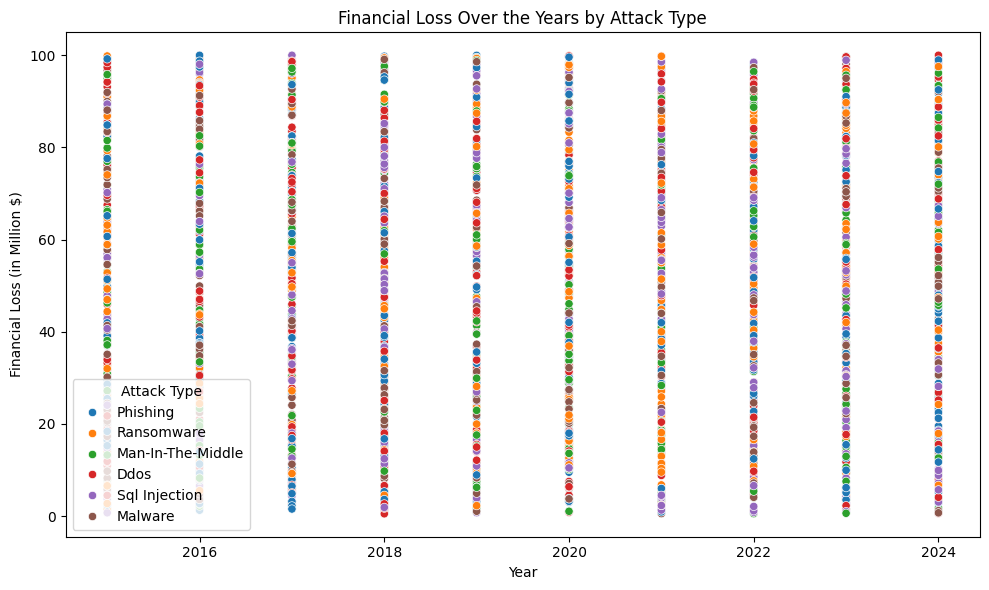

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Year', y='Financial Loss (in Million $)', hue='Attack Type')
plt.title('Financial Loss Over the Years by Attack Type')
plt.tight_layout()
plt.show()


World Map – Attack Count by Country

In [ ]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Attack Count",
                    color_continuous_scale="Reds",
                    title="Global Cyber Attacks by Country")
fig.show()


Timeline Chart – Top Cyber Incidents Over Years

In [ ]:
timeline_df = df[['Year', 'Attack Type', 'Target Industry']].drop_duplicates().sort_values(by='Year').head(10)
timeline_df


,Year,Attack Type,Target Industry
20,2015,Ransomware,Retail
29,2015,Ddos,Government
32,2015,Sql Injection,IT
1417,2015,Malware,Government
52,2015,Phishing,IT
40,2015,Ddos,Telecommunications
1484,2015,Man-In-The-Middle,Telecommunications
981,2015,Man-In-The-Middle,Government
1001,2015,Ddos,Healthcare
71,2015,Ransomware,Telecommunications


Box Plot: Financial Loss by Attack Type

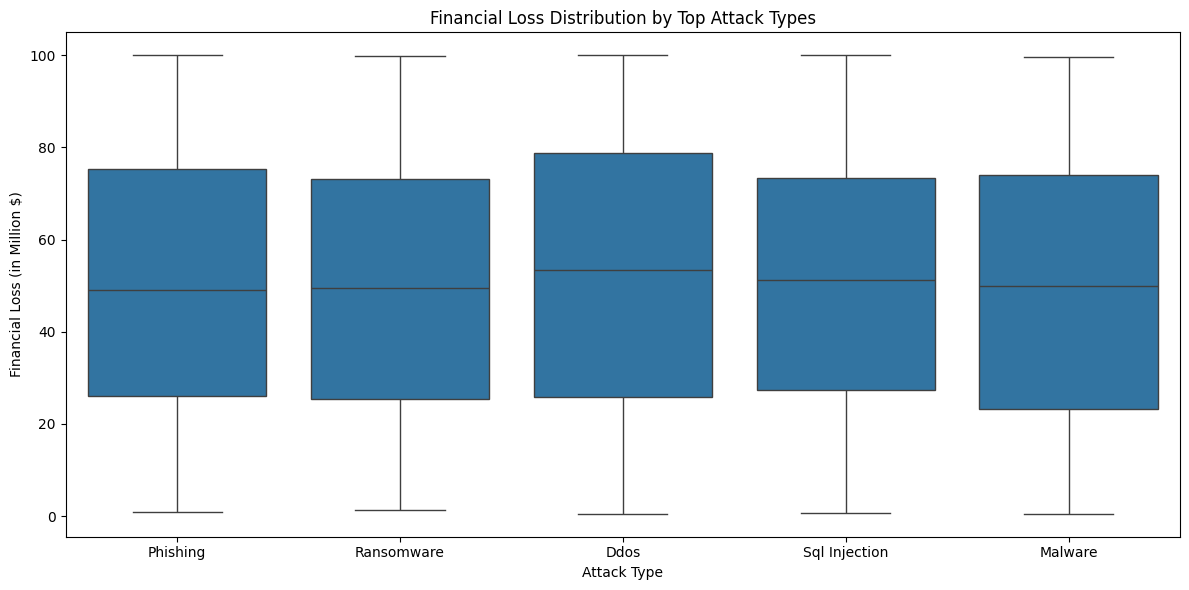

In [ ]:
top_attacks = df['Attack Type'].value_counts().nlargest(5).index
filtered_df = df[df['Attack Type'].isin(top_attacks)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x='Attack Type' , y='Financial Loss (in Million $)')
plt.title('Financial Loss Distribution by Top Attack Types')
plt.tight_layout()
plt.show()


Stacked Bar Chart – Attack Type Trends Over Years

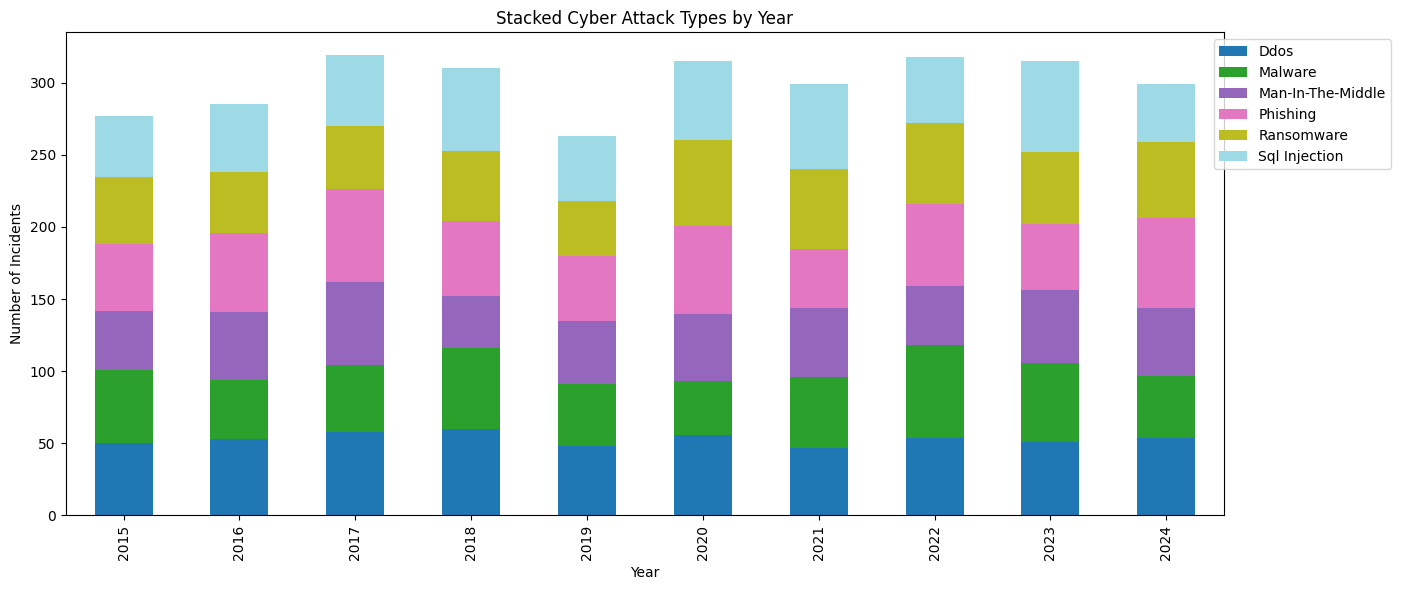

In [ ]:
attack_trend = df.groupby(['Year', 'Attack Type']).size().unstack().fillna(0)

attack_trend.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title('Stacked Cyber Attack Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()
